# Introduction: Fully Connected Neural Networks

## Typical steps for image classification using fully connected networks (FCNs)

- **To get started Image Classification with tensorflow I **

- Following steps were performed in order to achieve the end results and improve the accuracy :
   - [x] Encoded the labels.
   - [x] Understood neural networks.
   - [x] Preprocessed image examples.
   - [x] Created a neural network model.
   - [x] Trained the model to fit the dataset.
   - [x] Evaluated the model.
   - [x] Visualized the predictions.



In [4]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

# Task 2: The Dataset

 first import the data that we'd be working with and take a closer look at it. We are going to use the popular MNIST dataset which has lots of images of hand-written digits along with their labels.

In [5]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [25]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

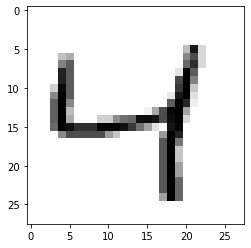

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[2], cmap = 'binary')
plt.show()

In [42]:
y_train[2]

4

In [43]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

# Task 3: One Hot Encoding

We will change the way this label is represented from a class name or number to a list of all possible classes with all the classes set to 0 except the one which this example belongs to - which will be set to 1. For example:


| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |


In [44]:
#Using one-hot encoding,   why? answer: it is related with the softmax function

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

To make sure the encoding worked, let's check the shape of the encoded labels.

In [45]:
print(y_train[0])
print('y_train shape: ', y_train_encoded.shape)
print('y_test shape: ', y_test_encoded.shape)

5
y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


And just like before, let's also take a look at the first label and make sure that encoding is correct:

In [46]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Task 4: Neural Networks

In the hand-written digit classification problem, we will have 128 nodes for two hidden layers, we will have 10 nodes for the output layer with each node corresponding to one output class, and of course we already know that the input is a 784 dimensional vector.

# Task 5: Preprocessing the Examples

We will create a Neural Network which will take 784 dimensional vectors as inputs (28 rows * 28 columns) and will output a 10 dimensional vector (For the 10 classes). We have already converted the outputs to 10 dimensional, one-hot encoded vectors. Now, let's convert the input to the required format as well. We will use numpy to easily unroll the examples from `(28, 28)` arrays to `(784, 1)` vectors.

In [47]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


Each element in each example is a pixel value. Let's take a look at a few values of just one example.

In [48]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


Pixel values, in this dataset, range from 0 to 255. While that's fine if we want to display our images, for our neural network to learn the weights and biases for different layers, computations will be simply much more effective and fast if we *normalized* these values. In order to normalize the data, we can calculate the mean and standard deviation for each example.

In [49]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

print('mean: ', x_mean)
print('std: ', x_std)

mean:  33.318421449829934
std:  78.56748998339798


Now we will normalise both the training and test set using the mean and standard deviation we just calculated. Notice that we will need to apply the same mean and standard deviation to the test set even though we did not use the test set to calculate these values.

In [50]:
epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

Note how we added a small value to our denominator. This is because, just in case if our std was close to zero, we'd get very large values as a result. In this case, that's obviously not true but we added this anyway as a good practice since this is typically done to ensure numerical stability.

We looked at some of the values for the first training example before. Let's take a look at it again, after having normalised the values.

In [51]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Task 6: Creating a Model

We use a Sequential class defined in Keras to create our model. All the layers are going to be Dense layers. This means, like our examples above, all the nodes of a layer would be connected to all the nodes of the preceding layer i.e. densely connected.

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

Finally, we will use the accuracy during training as a metric to keep track of as the model trains.

In [56]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Notice how we have over 100 thousand parameters (the weights and biases) to learn even though we are using only 2 hidden layers. For deep neural networks, this value can be, and often is, in millions.

In order to get the approximation of our function, we just need to fit the model to our data. We will use only training set to do this learning and will reserve the test set for later when we want to check the accuracy of our model. This is because, if we used only one set for both training and testing, the results may be biased and our model may have simply memorized all the examples instead of learning the relationship between features and label.

# Task 7: Training the Model

We are going to train the model for 5 epochs. Think of epoch like an iteration of all the examples going through the model. So, by setting the epochs to 3, we will go through all the training examples 3 times.

In [58]:
h = model.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 5
)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3762 - accuracy: 0.8898s - loss: 0.4047 
Epoch 2/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1839 - accuracy: 0.9469s - loss: - ETA: 0s - loss: 0.1877 - 
Epoch 3/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1394 - accuracy: 0.9596
Epoch 4/5
60000/60000 [==============================] - 2s 42us/sample - loss: 0.1137 - accuracy: 0.9669s - loss: 0.1
Epoch 5/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0954 - accuracy: 0.9718s


In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [20]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy * 100)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.1327 - accuracy: 0.9610
test set accuracy:  96.10000252723694


# Task 8: Predictions

In [24]:
preds = model.predict(x_test_norm)

print('shape of preds: ', preds.shape)
print(preds[0])

shape of preds:  (10000, 10)
[1.94109271e-05 4.06119341e-07 1.05543884e-04 7.12537789e-04
 9.26897883e-07 1.10765905e-04 2.16585292e-08 9.98693168e-01
 2.49054247e-05 3.32436699e-04]


We probably can't go through all the 10000 predictions for now, but we can take a look at the first few. Let's plot the first few test set images along with their predicted and actual labels and see how our trained model actually performed.

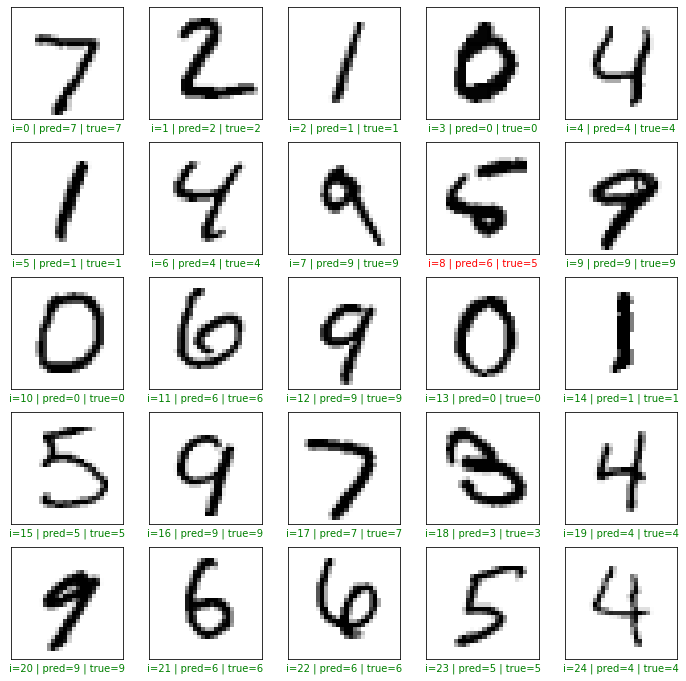

In [22]:
plt.figure(figsize = (12, 12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()


It gets most of the predictions right!

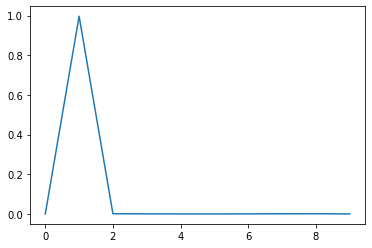

In [23]:
"""
Enter the index value in place of the value 8 below for the prediction
that you want to plot the probability scores for
"""
index = 2

plt.plot(preds[index])
plt.show()